<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/KFold_cross_validation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Fold cross-validation

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
url = 'https://www.kaggle.com/bumba5341/advertisingcsv'
od.download(url)

Skipping, found downloaded files in "./advertisingcsv" (use force=True to force download)


In [4]:
df = pd.read_csv('./advertisingcsv/Advertising.csv', index_col=False)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54a203fe10>,
      dtype=object)

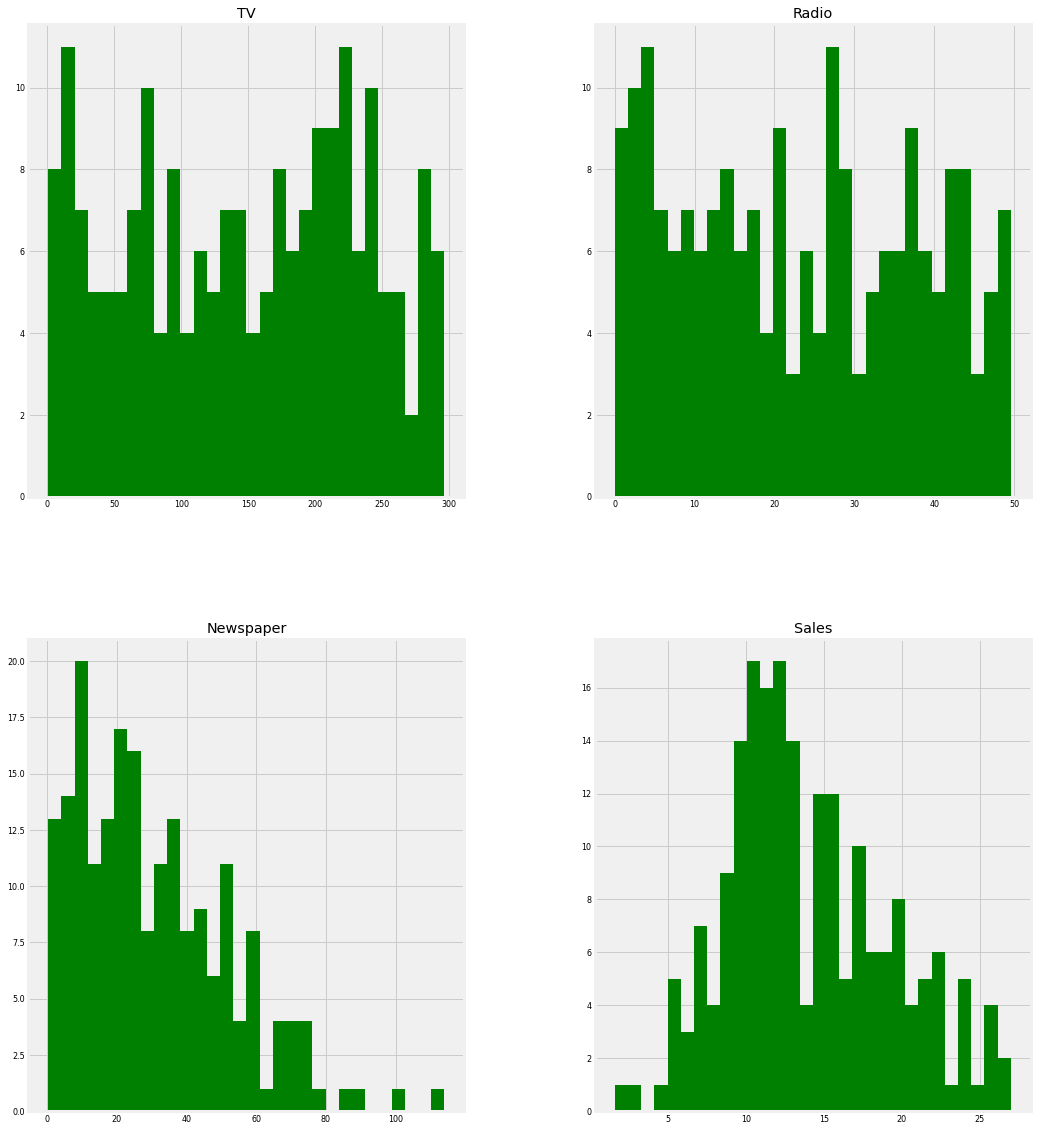

In [9]:
df.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

<Figure size 1008x576 with 0 Axes>

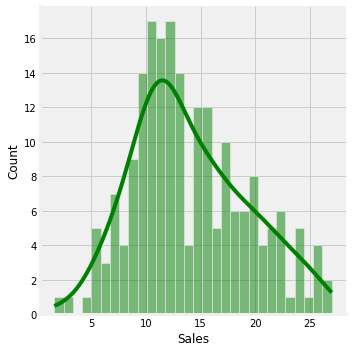

In [10]:
plt.figure(figsize=(14, 8))
sns.displot(df['Sales'], color='g', bins=30, kde=True);

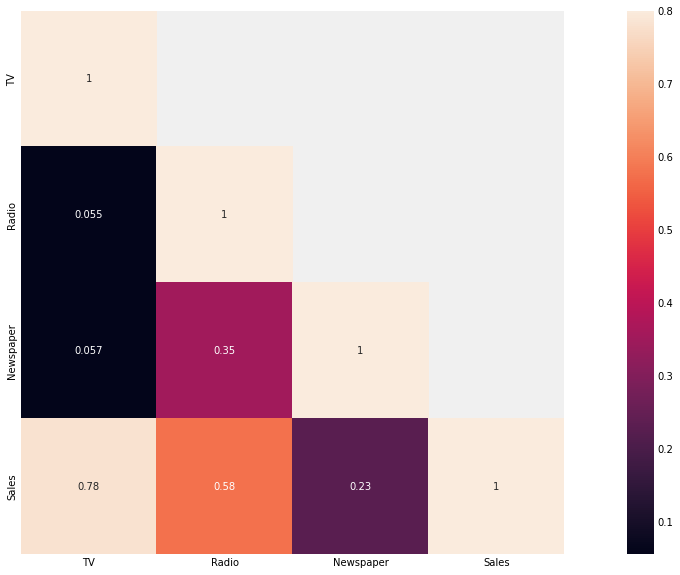

In [11]:
corr_mat = df.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, mask=mask,vmax=.8, square=True,annot=True)

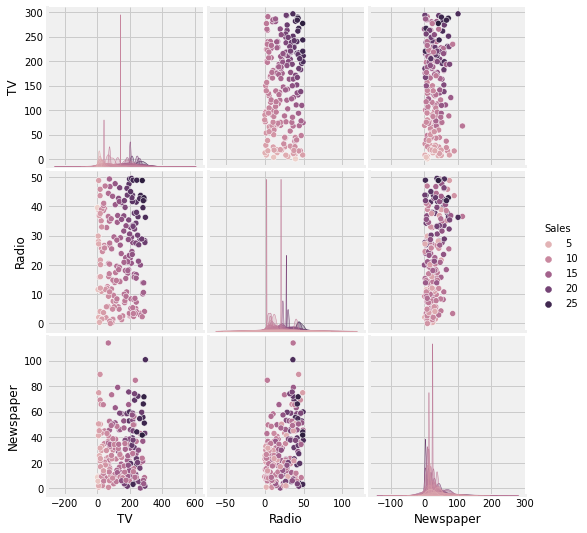

In [12]:
sns.pairplot(df, hue='Sales')

### Splitting data

In [13]:
from sklearn.model_selection import (
    train_test_split,
    KFold,
)

# train_val, test_df = train_test_split(df, test_size=0.2, random_state=0)
# train_df, val_df = train_test_split(train_val, test_size=0.2, random_state=0)

# input_cols = list(df.columns)[:-1]
# target_col = 'Sales'

# X_train = train_df[input_cols].copy()
# y_train = train_df[target_col].copy()

# X_val = val_df[input_cols].copy()
# y_val = val_df[target_col].copy()

# X_test = test_df[input_cols].copy()
# y_test = test_df[target_col].copy()

# print(f'Train shape: {X_train.shape}, {y_train.shape}')
# print(f'Validation shape: {X_val.shape}, {y_val.shape}')
# print(f'Test shape: {X_test.shape}, {y_test.shape}')

### Rescaling Data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df2 = df.copy()
df2.iloc[:, :-1] = scaler.fit_transform(df2.iloc[:, :-1])


df2.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,9.3
3,0.052050,1.217855,1.286405,18.5
4,0.394182,-0.841614,1.281802,12.9


## Model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### Simple cross validation

In [16]:
random_states = [0, 1, 7, 9, 42, 100, 121]

data, target = df2.drop(columns=['Sales']), df2.Sales
scores = {}

for rs in random_states:
  X_train_rs, X_test_rs, y_train_rs, y_tests_rs = train_test_split(data, target,
                                                                   test_size=0.2,
                                                                   random_state=rs)
  model.fit(X_train_rs, y_train_rs)
  scores[rs] = model.score(X_test_rs, y_tests_rs).round(3) * 100

for k, v in scores.items():
  print('random_state: ', k, ': ', v)



random_state:  0 :  86.0
random_state:  1 :  89.3
random_state:  7 :  91.0
random_state:  9 :  92.60000000000001
random_state:  42 :  89.9
random_state:  100 :  91.8
random_state:  121 :  90.4
